<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-VictorRegueira/blob/main/Actividades_Generales/Act_Sem7/Notebook1_Regresion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Presentación

**Ciencia y Analítica de Datos**

Por:

* Víctor Alejandro Regueira Romero - A01794404

Profesor asignado:
* Roberto Antonio Guevara González

A 8 de noviembre de 2022

# Actividad Semanal 7 **Regresiones**

Librerías

In [1]:
#Nuestras librerias
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error,  make_scorer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import power_transform
from sklearn.model_selection import RepeatedKFold, RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, train_test_split, RepeatedKFold, cross_validate


## Ejercicio 1

Utiliza la base de datos de https://www.kaggle.com/vinicius150987/manufacturing-cost

Suponga que trabaja como consultor de una empresa de nueva creación que busca desarrollar un modelo para estimar el costo de los bienes vendidos a medida que varían el volumen de producción (número de unidades producidas). La startup recopiló datos y le pidió que desarrollara un modelo para predecir su costo frente a la cantidad de unidades vendidas.

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/EconomiesOfScale.csv')
df.sample(10)

,Number of Units,Manufacturing Cost
5,1.307435,100.000000
981,7.503608,24.799148
920,6.356890,29.910470
458,4.302063,38.896746
136,3.049856,54.462176
227,3.426827,36.112219
123,2.947365,34.432251
702,5.173123,35.105315
31,1.895731,52.114125
138,3.054662,49.060484


In [3]:
X = df[['Number of Units']]
y = df[['Manufacturing Cost']]

In [4]:
print(f'Tamaños \nX: {X.shape} \ny: {y.shape}')

Tamaños 
X: (1000, 1) 
y: (1000, 1)


Gráfico de las features y salida completas

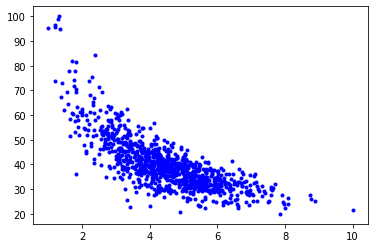

In [5]:
plt.plot(X,y,'b.')

### Dividiendo los datos del costo de manufacatura

In [6]:
#Usaremos la función train_test_split() para dividir nuestros datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


Listas con resultados de MAE y r2

In [7]:
lista_para_mae =[] #Lista para almacenar los valores de resultado MAE
lista_para_r2 =[] #Lista para almacenar los valores de resultado R2

Definimos una función que traiga de vuelta los resultados de predicción

In [8]:
def results_pred(y_t, y_modelo_prediction):
  #Calculamos el valor de Error Medio Absoluto (MAE) y R2
  mae = metrics.mean_absolute_error(y_t,y_modelo_prediction)
  r2= r2_score(y_t,y_modelo_prediction)

  #Agregamos los valores a nuestras listas
  lista_para_mae.append(mae) 
  lista_para_r2.append(r2)

  #Los errores
  print('Error medio Absoluto (MAE):', mae)
  print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_t,y_modelo_prediction)))

  #La r cuadrada
  print('r2_score', r2)

Realizamos una distribución 80-20:

* 80 train
* 20 test

In [9]:
print(X_train.shape)
print(X_test.shape)
print('-'*15)
print(y_train.shape)
print(y_test.shape)

(800, 1)
(200, 1)
---------------
(800, 1)
(200, 1)


### Regresión Lineal

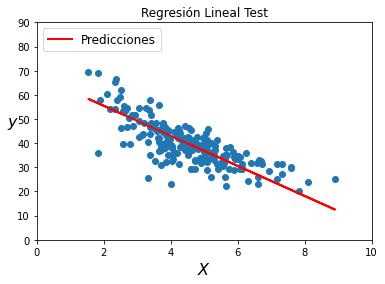

In [10]:
#Definimos el objeto que almacenará el método de Regresión Lineal
lr = LinearRegression(fit_intercept=True)
#Ajustamos el modelo a los datos de entrenamiento
lr.fit(X_train, y_train)

#Preparamos las variables de prueba (test) para realizar la predicción
X_lr = X_test  #Aqui recordemos que se hace con los de prueba, no con los de entrenamiento
y_lr = lr.predict(X_lr)

#Gráfico de dispersión (Scatter) para ver la distribución de los datos de prueba
plt.scatter(X_test, y_test)

#Línea de predicción
plt.plot(X_lr, y_lr, 'r-', linewidth=2, label='Predicciones')
plt.xlabel("$X$", fontsize=16)
plt.ylabel("$y$", rotation=0, fontsize=16)
plt.legend(loc="upper left", fontsize=12);
plt.title(label = 'Regresión Lineal Test')
plt.axis([0, 10, 0, 90]);

La línea de predicción abarca una gran parte de los datos de muestra, sin embargo, la única forma de ver numericamente este resultado es calculando sus errores y r2. Aún así vemos que la distribución de los datos se mantiene entre los valores en X del 3 al 6.

In [11]:
#Ecuación del modelo
print(f' y=  {lr.coef_}X + {lr.intercept_}')

 y=  [[-6.21850698]]X + [67.89012909]


$\hat{y} = -6.22X + 67.89$

In [12]:
results_pred(y_test, y_lr)

Error medio Absoluto (MAE): 4.513943834797746
Root Mean Squared Error (RMSE): 5.932738736518161
r2_score 0.5695897011831419


El modelo tiene un r2_score del **0.57**, por lo que no se ajusta con un índice alto a nuestro set de datos prueba. Esto se ve reflejado en el gráfico, debido a que los  valores de X entre el 7 y el 9 tienen muy pocos números de muestras y están distribuidas con mayor variación que los valores de X de 3 a 6.

### Regresión Polinomial

In [13]:
#Definimos el objeto que almacenará el método de Regresión Polinomial
pr = PolynomialFeatures(degree=2, include_bias=False)
#Ajustamos el modelo a los datos de entrenamiento
caracteristicas = pr.fit_transform(X_train)
pr_ = LinearRegression(fit_intercept=True)
pr_.fit(caracteristicas, y_train)

LinearRegression()

In [14]:
pr_.coef_, pr_.intercept_

(array([[-17.81636965,   1.27181952]]), array([92.03582035]))

In [15]:
#Preparamos las variables de prueba (test) para realizar la predicción
X_pr = pr.fit_transform(X_test)  #Aqui recordemos que se hace con los de prueba, no con los de entrenamiento
y_pr = pr_.predict(X_pr)
print(X_pr.shape)
print(y_pr.shape)

(200, 2)
(200, 1)


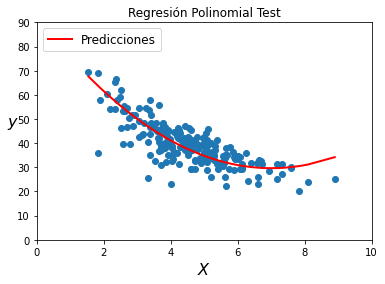

In [16]:
#Ordenamos los datos
orden = np.argsort(X_test.values.ravel()) #Sacamos el ordende los datos

orden_X = X_test.values.ravel()[orden] 
orden_y = y_test.values.ravel()[orden]

sorted_predicPoly = y_pr[orden]

#Gráfico de dispersión (Scatter) para ver la distribución de los datos de prueba
plt.scatter(X_test, y_test)

#Línea de predicción
plt.plot(orden_X, sorted_predicPoly, 'r-', linewidth=2, label='Predicciones')
plt.xlabel("$X$", fontsize=16)
plt.ylabel("$y$", rotation=0, fontsize=16)
plt.legend(loc="upper left", fontsize=12);
plt.title(label = 'Regresión Polinomial Test')
plt.axis([0, 10, 0, 90]);

In [17]:
#Ecuación del modelo
print(f' y=  {pr_.coef_[0,1]} X^2 + {pr_.coef_[0,0]} X + {pr_.intercept_[0]}')

 y=  1.2718195213149832 X^2 + -17.81636965261764 X + 92.03582034949117


$\hat{y} = 1.27X^2 -17.81X + 92.03 $

In [18]:
results_pred(y_test, y_pr)

Error medio Absoluto (MAE): 4.372292708304972
Root Mean Squared Error (RMSE): 5.764249049866789
r2_score 0.5936898412489064


### Regresión con Ridge

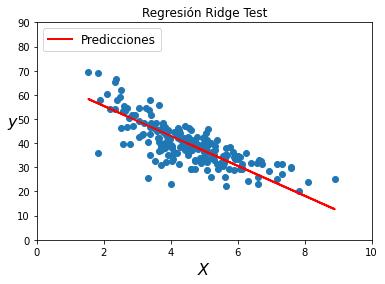

In [19]:
#Definimos el objeto que almacenará el método de Regresión Lineal
rr = Ridge(alpha=5.0, fit_intercept=True)
#Ajustamos el modelo a los datos de entrenamiento
rr.fit(X_train, y_train)

#Preparamos las variables de prueba (test) para realizar la predicción
X_rr = X_test
y_rr = rr.predict(X_rr)

#Gráfico de dispersión (Scatter) para ver la distribución de los datos de prueba
plt.scatter(X_test, y_test)

#Línea de predicción
plt.plot(X_rr, y_rr, 'r-', linewidth=2, label='Predicciones')
plt.xlabel("$X$", fontsize=16)
plt.ylabel("$y$", rotation=0, fontsize=16)
plt.legend(loc="upper left", fontsize=12);
plt.title(label = 'Regresión Ridge Test')
plt.axis([0, 10, 0, 90]);

In [20]:
#Ecuación del modelo
print(f' y=  {rr.coef_[0,0]} X + {rr.intercept_[0]}')

 y=  -6.196917757577494 X + 67.79389388826765


$\hat{y} = -6.19X + 67.79$

In [21]:
results_pred(y_test, y_rr)

Error medio Absoluto (MAE): 4.510020657963267
Root Mean Squared Error (RMSE): 5.92680190097749
r2_score 0.5704506852084535


### Regresión con Lasso

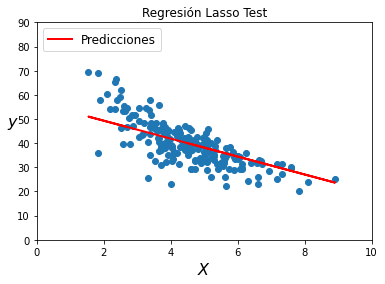

In [22]:
#Definimos el objeto que almacenará el método Lasso
rl = Lasso(alpha=4.5, fit_intercept=True)
#Ajustamos el modelo a los datos de entrenamiento
rl.fit(X_train, y_train)

#Preparamos las variables de prueba (test) para realizar la predicción
X_rl = X_test
y_rl = rl.predict(X_rl)

#Gráfico de dispersión (Scatter) para ver la distribución de los datos de prueba
plt.scatter(X_test, y_test)

#Línea de predicción
plt.plot(X_rl, y_rl, 'r-', linewidth=2, label='Predicciones')
plt.xlabel("$X$", fontsize=16)
plt.ylabel("$y$", rotation=0, fontsize=16)
plt.legend(loc="upper left", fontsize=12);
plt.title(label = 'Regresión Lasso Test')
plt.axis([0, 10, 0, 90]);

In [23]:
#Ecuación del modelo
print(f' y=  {rl.coef_[0]} X + {rl.intercept_[0]}')

 y=  -3.7101246549023053 X + 56.7088702004901


$\hat{y} = -3.71X + 56.71$

In [24]:
results_pred(y_test, y_rl)

Error medio Absoluto (MAE): 4.607722961453652
Root Mean Squared Error (RMSE): 6.1559441506246095
r2_score 0.5365941097353752


### Resultados Regresión

In [25]:
#Listas con resultados
print(lista_para_mae)
print(lista_para_r2)

[4.513943834797746, 4.372292708304972, 4.510020657963267, 4.607722961453652]
[0.5695897011831419, 0.5936898412489064, 0.5704506852084535, 0.5365941097353752]


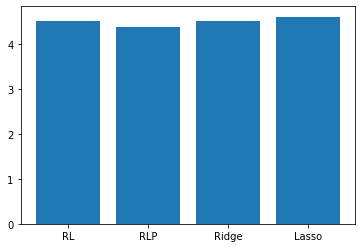

In [26]:
#Grafico de mae
nombres=list()
nombres.append('RL')
nombres.append('RLP')
nombres.append('Ridge')
nombres.append('Lasso')

plt.bar(nombres, lista_para_mae)
plt.show()


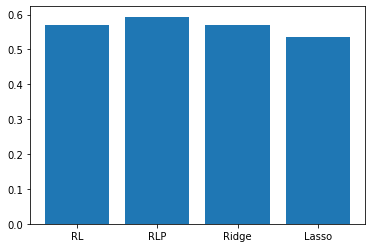

In [27]:
#Grafico de r cuadrada
nombres=list()
nombres.append('RL')
nombres.append('RLP')
nombres.append('Ridge')
nombres.append('Lasso')

plt.bar(nombres, lista_para_r2)
plt.show()


In [28]:
y_lr.shape

(200, 1)

In [29]:
y_pr.shape

(200, 1)

In [30]:
y_rr.shape

(200, 1)

In [31]:
y_rl.shape

(200,)

In [32]:
y_rl = np.reshape(y_rl,[200,1])

In [33]:
y_rl.shape

(200, 1)

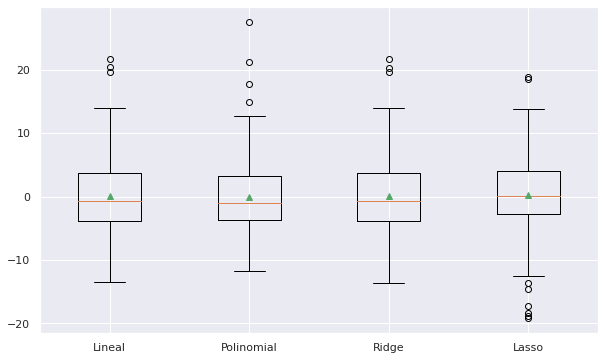

In [34]:
residuo_regresion_simple=np.array(y_lr - y_test)
residuo_regresion_poliforme= np.array(y_pr - y_test)
residuo_ridge=np.array(y_rr - y_test)
residuo_lasso=np.array(y_rl - y_test)

lista_residuos = [residuo_regresion_simple.ravel(),residuo_regresion_poliforme.ravel(),residuo_ridge.ravel(),residuo_lasso.ravel()]

nombres=list()
nombres.append('Lineal')
nombres.append('Polinomial')
nombres.append('Ridge')
nombres.append('Lasso')

#grafica del MAE (de los cuatro métodos)
sns.set(rc={'figure.figsize':(10,6)})

plt.boxplot(lista_residuos, labels=nombres, showmeans=True)
plt.show()

### Conclusiones del Ejercicio 1

Explica tus resultados, que método conviene más a la empresa, ¿por que?, ¿que porcentajes de entrenamiento y evaluación usaste?, ¿que error tienes?, ¿es bueno?, ¿cómo lo sabes?

> EL método que mejores resultados está presentando es el de **Regresión Polinomial**. Debido a que este tiene un índice más alto de R2, esto se ve reflejado en el gráfico, donde podemos visualizar cómo los datos presentan una ligera curva, la ventaja de utilizar la Regresión Polinomial es que va aplicando estas curvas a nuestra  predicción, pudiendo obtener valores más similares entre la predicción y el test. Por otro lado, el MAE, no nos indica mas que el punto donde se concentra una mayor cantidad de valores.

> Usé un porcentaje de entrenaiento de **80%** y de prueba de **20%**, busqué distribuir de esta forma los datos para tener un alto número de entrenamiento y poder evaluar con una considerable muestra de los datos.

>Tenemos dos errores. Los cuales nos representan que el mayor conjunto de datos se presenta en los valores cercanos al 5.76, esto con base a los valores presentados en nuestra única feature representada con la variable X. Ambos son errores similares, es donde se concentra la mayor cantidad de muestras.
* Error medio Absoluto (MAE): 4.372292708304972
* Root Mean Squared Error (RMSE): 5.764249049866789

>No es malo, ni bueno. Simplemente nos presenta un panorama de dónde estamos teniendo una mayor concentración de datos, por lo tanto, considerar esta parte para el modelo y para los distintos conjuntos de datos que se llegarían a testear.

## Ejercicio 2

In [35]:
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/kc_house_data.csv')
df.sample(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1067,1607100139,20140725T000000,250000.0,3,1.00,1190,6250,1.0,0,0,...,7,990,200,1954,0,98108,47.5658,-122.292,1760,6434
12513,9144100158,20141229T000000,445000.0,3,1.00,1260,8910,1.0,0,0,...,7,1260,0,1949,0,98117,47.7000,-122.375,1560,8910
21270,1773100541,20150417T000000,389950.0,3,2.25,1580,920,3.0,0,0,...,8,1580,0,2015,0,98106,47.5578,-122.363,1250,1150
12645,7217400650,20150424T000000,458500.0,3,1.50,1280,1920,1.5,0,0,...,7,1280,0,1905,1990,98122,47.6117,-122.301,1280,3150
20907,8562780540,20141222T000000,325000.0,2,2.25,1150,711,2.0,0,0,...,7,1150,0,2013,0,98027,47.5323,-122.070,1150,748
9059,8731900790,20140626T000000,354950.0,4,2.75,2530,7350,1.0,0,0,...,8,1280,1250,1977,0,98023,47.3130,-122.374,2280,7350
10444,1775500310,20150121T000000,455000.0,4,1.75,3060,94089,1.0,0,0,...,8,3060,0,1958,0,98072,47.7440,-122.087,2180,43995
13989,9528103443,20140724T000000,410000.0,2,1.50,1180,1034,2.0,0,0,...,7,1120,60,2001,0,98115,47.6780,-122.322,1137,1034
4717,2025049006,20141112T000000,750000.0,7,2.75,3410,4056,1.5,0,0,...,8,2130,1280,1906,0,98102,47.6454,-122.316,2510,4056
3844,2734100734,20141015T000000,216650.0,3,3.50,1540,1427,2.0,0,0,...,7,1360,180,2007,0,98109,47.5420,-122.322,1220,4000


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [37]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [38]:
df.drop('id', axis = 1, inplace = True)
df.drop('date', axis = 1, inplace = True)
df.drop('zipcode', axis = 1, inplace = True)
df.drop('lat', axis = 1, inplace = True)
df.drop('long', axis = 1, inplace = True)


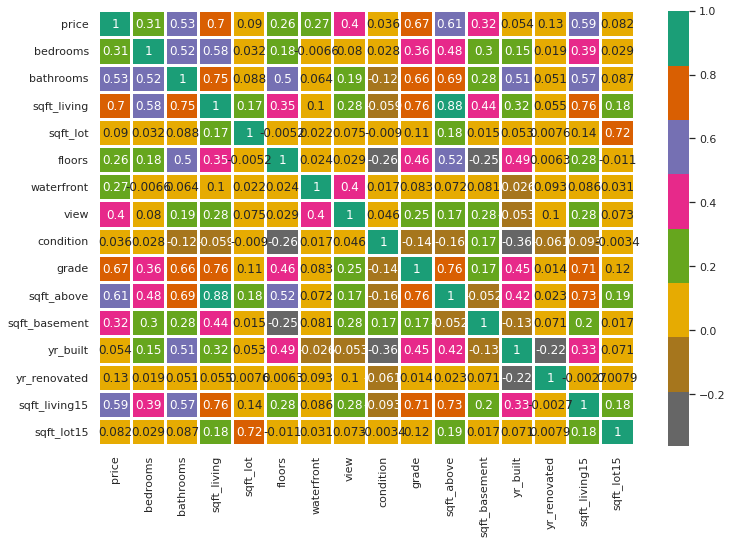

In [39]:
plt.figure(figsize=(12,8)) 
sns.heatmap(df.corr(), annot=True, cmap='Dark2_r', linewidths = 2)
plt.show()

In [40]:
columns = df.columns.drop('price')

features = columns
label = ['price']

X = df[features]
y = df[label]

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)

print(f'Numero total de registros en la bdd: {len(X)}')
print("*****"*10)
print(f'Numero total de registros en el training set: {len(X_train)}')
print(f'Tamaño de X_train: {X_train.shape}')
print("*****"*10)
print(f'Mumero total de registros en el test dataset: {len(X_test)}')
print(f'Tamaño del X_test: {X_test.shape}')

Numero total de registros en la bdd: 21613
**************************************************
Numero total de registros en el training set: 17290
Tamaño de X_train: (17290, 15)
**************************************************
Mumero total de registros en el test dataset: 4323
Tamaño del X_test: (4323, 15)


Listas con resultados múltiples de MAE y r2

In [42]:
lista_mae_mult = []
lista_r2_mult = []

Definimos una función que traiga de vuelta los resultados de predicción

In [43]:
def results(y_t, y_modelo_prediction):
  #Calculamos el valor de Error Medio Absoluto (MAE) y R2
  mae = metrics.mean_absolute_error(y_t,y_modelo_prediction)
  r2= r2_score(y_t,y_modelo_prediction)

  #Agregamos los valores a nuestras listas
  lista_mae_mult.append(mae) 
  lista_r2_mult.append(r2)

  #Los errores
  print('Error medio Absoluto (MAE):', mae)
  print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_t,y_modelo_prediction)))

  #La r cuadrada
  print('r2_score', r2)

### Regresión Múltiple Lineal

In [44]:
#Definimos el objeto que almacenará el método de Regresión Lineal
lr = LinearRegression(fit_intercept=True)
#Ajustamos el modelo a los datos de entrenamiento
lr.fit(X_train, y_train)

#Preparamos las variables de prueba (test) para realizar la predicción
X_lr = X_test  #Aqui recordemos que se hace con los de prueba, no con los de entrenamiento
y_lr = lr.predict(X_lr)

In [45]:
#Ecuación del modelo
print(f' y=  {lr.coef_}X + {lr.intercept_}')

 y=  [[-3.71022526e+04  4.01418845e+04  1.09169906e+02  2.64378621e-02
   2.95338523e+04  5.52048615e+05  4.22004055e+04  2.21281704e+04
   1.21117318e+05  5.02818538e+01  5.88880527e+01 -3.52812693e+03
   1.04703799e+01  2.60075557e+01 -5.66471373e-01]]X + [6093360.93532767]


$\hat{y} = -6.22X + 67.89$

In [46]:
results(y_test, y_lr)

Error medio Absoluto (MAE): 136332.19435816686
Root Mean Squared Error (RMSE): 213832.57523968336
r2_score 0.6648546558345214


### Regresión Múltiple Polinomial

In [47]:
#Definimos el objeto que almacenará el método de Regresión Polinomial
pr = PolynomialFeatures(degree=2, include_bias=False)
#Ajustamos el modelo a los datos de entrenamiento
caracteristicas = pr.fit_transform(X_train)
pr_ = LinearRegression(fit_intercept=True)
pr_.fit(caracteristicas, y_train)

LinearRegression()

In [48]:
#Preparamos las variables de prueba (test) para realizar la predicción
X_pr = pr.fit_transform(X_test)  #Aqui recordemos que se hace con los de prueba, no con los de entrenamiento
y_pr = pr_.predict(X_pr)
print(X_pr.shape)
print(y_pr.shape)

(4323, 135)
(4323, 1)


In [49]:
#Ecuación del modelo
print(f' y=  {pr_.coef_[0,1]} X^2 + {pr_.coef_[0,0]} X + {pr_.intercept_[0]}')

 y=  -1174738.7180232732 X^2 + 1015466.4318458493 X + 80863582.48791893


In [50]:
results(y_test, y_pr)

Error medio Absoluto (MAE): 122015.80006144893
Root Mean Squared Error (RMSE): 181470.06574727758
r2_score 0.7586232413126757


### Regresión Múltiple Ridge

In [51]:
#Definimos el objeto que almacenará el método de Regresión Lineal
rr = Ridge(alpha=5.0, fit_intercept=True)
#Ajustamos el modelo a los datos de entrenamiento
rr.fit(X_train, y_train)

#Preparamos las variables de prueba (test) para realizar la predicción
X_rr = X_test
y_rr = rr.predict(X_rr)

In [52]:
#Ecuación del modelo
print(f' y=  {rr.coef_[0,0]} X + {rr.intercept_[0]}')

 y=  -37197.32907970298 X + 6090396.451460115


In [53]:
results(y_test, y_rr)

Error medio Absoluto (MAE): 136362.008581779
Root Mean Squared Error (RMSE): 213932.73613047396
r2_score 0.6645406127749439


### Regresión Múltiple Lasso

In [54]:
#Definimos el objeto que almacenará el método Lasso
rl = Lasso(alpha=4.5, fit_intercept=True)
#Ajustamos el modelo a los datos de entrenamiento
rl.fit(X_train, y_train)

#Preparamos las variables de prueba (test) para realizar la predicción
X_rl = X_test
y_rl = rl.predict(X_rl)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.683e+14, tolerance: 2.323e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


In [55]:
#Ecuación del modelo
print(f' y=  {rl.coef_[0]} X + {rl.intercept_[0]}')

 y=  -37096.54901206791 X + 6093022.501621628


In [56]:
results(y_test, y_rl)

Error medio Absoluto (MAE): 136333.23526527287
Root Mean Squared Error (RMSE): 213835.54773811705
r2_score 0.6648453380218942


### Resultados de Regresión Múltiple

In [57]:
lista_mae_mult
lista_r2_mult

[0.6648546558345214,
 0.7586232413126757,
 0.6645406127749439,
 0.6648453380218942]

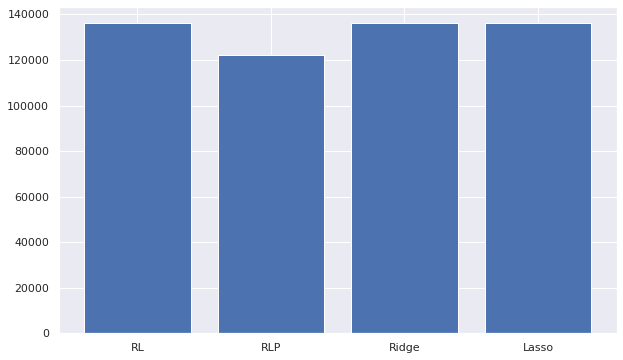

In [59]:
#Grafico de mae
nombres=list()
nombres.append('RL')
nombres.append('RLP')
nombres.append('Ridge')
nombres.append('Lasso')

plt.bar(nombres, lista_mae_mult)
plt.show()

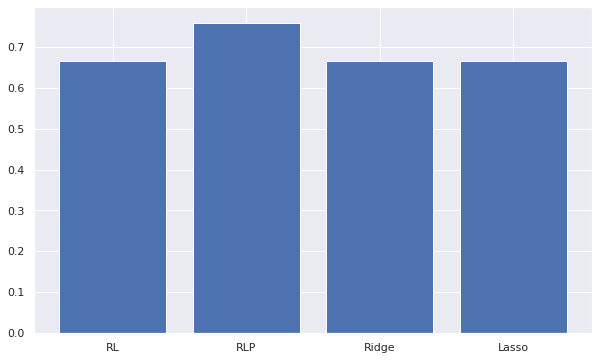

In [58]:
#Grafico de r cuadrada
nombres=list()
nombres.append('RL')
nombres.append('RLP')
nombres.append('Ridge')
nombres.append('Lasso')

plt.bar(nombres, lista_r2_mult)
plt.show()


In [60]:
y_rl = np.reshape(y_rl,[4323,1])

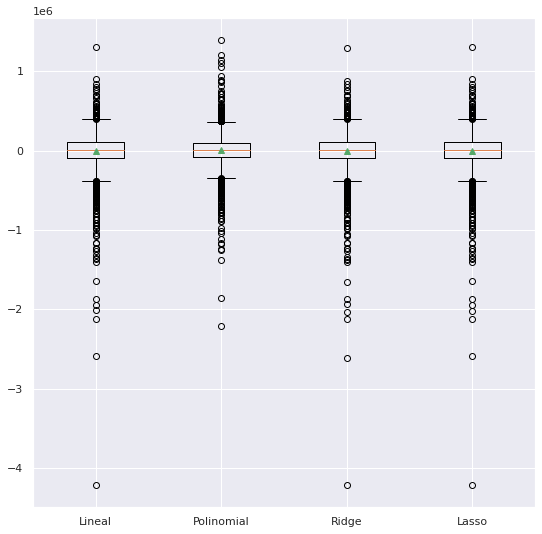

In [61]:
residuo_regresion_simple=np.array(y_lr - y_test)
residuo_regresion_poliforme= np.array(y_pr - y_test)
residuo_ridge=np.array(y_rr - y_test)
residuo_lasso=np.array(y_rl - y_test)
cols = [residuo_regresion_simple.ravel(),residuo_regresion_poliforme.ravel(),residuo_ridge.ravel(),residuo_lasso.ravel()]

lista_residuos = cols
#scaler = MinMaxScaler()
#trans_lista_residuos = scaler.fit_transform(lista_residuos)
#trans_lista_residuos = pd.DataFrame(trans_lista_residuos)
#trans_lista_residuos.columns = cols

nombres=list()
nombres.append('Lineal')
nombres.append('Polinomial')
nombres.append('Ridge')
nombres.append('Lasso')

#grafica del MAE (de los cuatro métodos)
sns.set(rc={'figure.figsize':(9,9)})

plt.boxplot(lista_residuos, labels=nombres, showmeans=True)
plt.show()

### Conclusiones del Ejercicio 2

Explica tus resultados, que método conviene más a la empresa, ¿por que?, ¿que porcentajes de entrenamiento y evaluación usaste?, ¿que error tienes?, ¿es bueno?, ¿cómo lo sabes?

> EL método que mejores resultados está presentando es el de **Regresión Polinomial**. Debido a que este tiene un índice más alto de R2 **(0.7586)**, esto se ve reflejado en el gráfico, donde podemos visualizar cómo los datos presentan una ligera curva, la ventaja de utilizar la Regresión Polinomial es que va aplicando estas curvas a nuestra  predicción, pudiendo obtener valores más similares entre la predicción y el test. Por otro lado, el MAE, no nos indica mas que el punto donde se concentra una mayor cantidad de valores.

> Usé un porcentaje de entrenaiento de **80%** y de prueba de **20%**, busqué distribuir de esta forma los datos para tener un alto número de entrenamiento y poder evaluar con una considerable muestra de los datos.

>Tenemos dos errores. Los cuales nos representan que el mayor conjunto de datos se presenta en los valores cercanos al 122015, esto con base a los valores presentados en nuestra única feature representada con la variable X. Ambos son errores similares, es donde se concentra la mayor cantidad de muestras.
* Error medio Absoluto (MAE): 122015.80006144893
* Root Mean Squared Error (RMSE): 181470.06574727758
* r2_score 0.7586232413126757

>No es malo, ni bueno. Simplemente nos presenta un panorama de dónde estamos teniendo una mayor concentración de datos, por lo tanto, considerar esta parte para el modelo y para los distintos conjuntos de datos que se llegarían a testear.